#### Predicting heart disease using machine learning
steps gonna follow:
1. Problem statement
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### Problem Statement: 
  From the given clinical data of the patients can we predict whether they have heartdisease or not?

### Evaluation:
    If we can reach 95% accuracy at predicting then we pursue this project
### Features:

1. Age: 45
2. Sex: 0 (0 for male, 1 for female)
3. Chest pain type (4 values): 2 (0, 1, 2, 3)
4. Resting blood pressure: 130 mmHg
5. Serum cholesterol in mg/dL: 236
6. Fasting blood sugar > 120 mg/dL: 0 (0 for <= 120 mg/dL, 1 for > 120 mg/dL)
7. Resting electrocardiographic results (values 0, 1, 2): 1 (0, 1, 2)
8. Maximum heart rate achieved: 150 bpm
9. Exercise-induced angina: 1 (0 for no, 1 for yes)
10. Oldpeak = ST depression induced by exercise relative to rest: 2.3
11. The slope of the peak exercise ST segment: 1 (0, 1, 2)
12. Number of major vessels (0-3) colored by fluoroscopy: 0 (0, 1, 2, 3)
13. Thal: 0 (0 for normal, 1 for fixed defect, 2 for reve
14.  Target (0 or 1)nal description.sable defectsable defect

#### Preparing the tools

In [1]:
#Importing all the required tools

#Regular EDA (exploratory data analysis ) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To have plots inside the jupyter notebook itself
%matplotlib inline

#Models from Scikitlearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import RocCurveDisplay 


In [2]:
#Load data
df = pd.read_csv("heart-disease.csv")
df.shape # (rows,columns)

(303, 14)

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

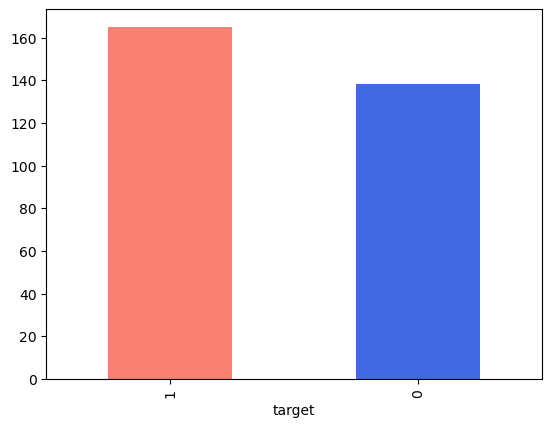

In [5]:
df["target"].value_counts().plot(kind="bar",color=["salmon","royalblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [8]:
pd.crosstab(df['target'],df['sex'])

sex      0    1
target         
0       24  114
1       72   93

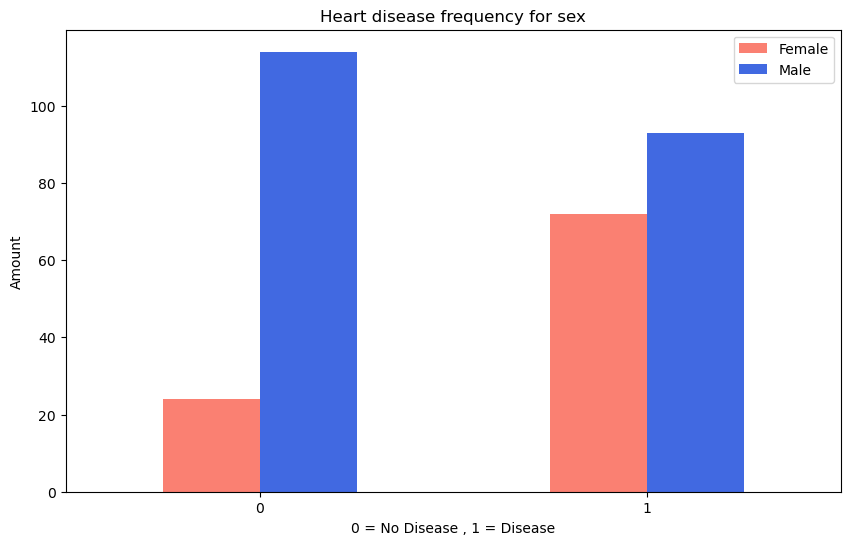

In [9]:
pd.crosstab(df['target'],df['sex']).plot(kind="bar",figsize=(10,6),color = ["salmon","royalblue"])
plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation = 0);

# Age vs Max Heart Rate for Heart Disease

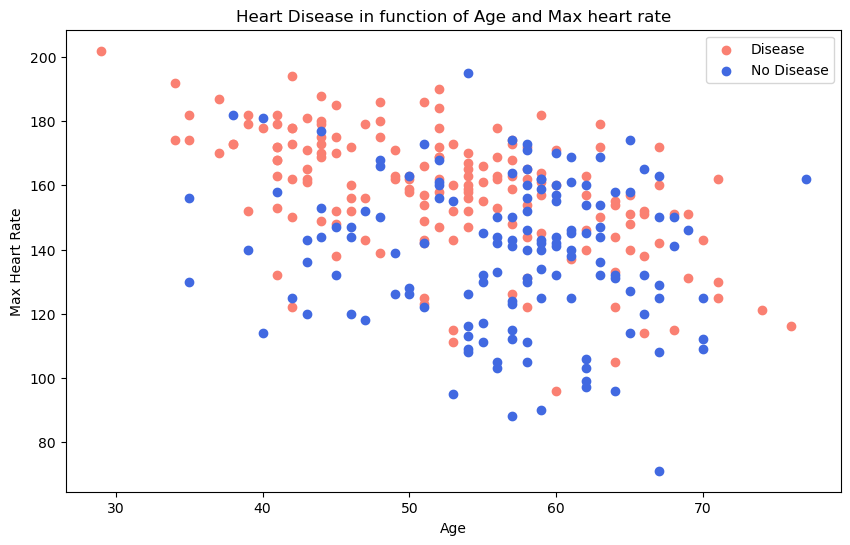

In [10]:
#Create a figure
plt.figure(figsize=(10,6))
#Scatter plot of positives
plt.scatter(df["age"][df["target"]==1],
            df["thalach"][df["target"]==1],
            c="salmon");
#Scatter plot of negatives
plt.scatter(df["age"][df["target"]==0],
            df["thalach"][df["target"]==0],
            c="royalblue");
#Customizing
plt.title("Heart Disease in function of Age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

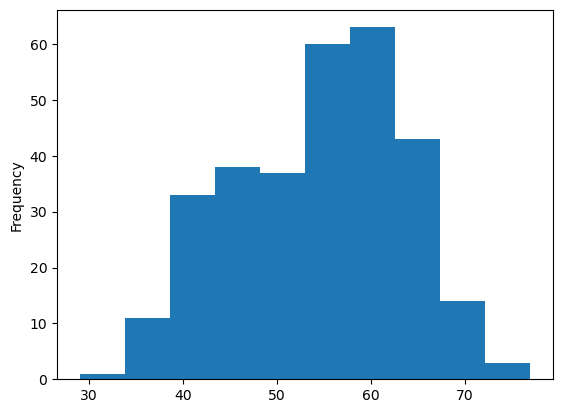

In [11]:
df["age"].plot.hist();

# Heart Disease Frequency per Chest Pain Type

In [12]:
pd.crosstab(df["cp"],df["target"])

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

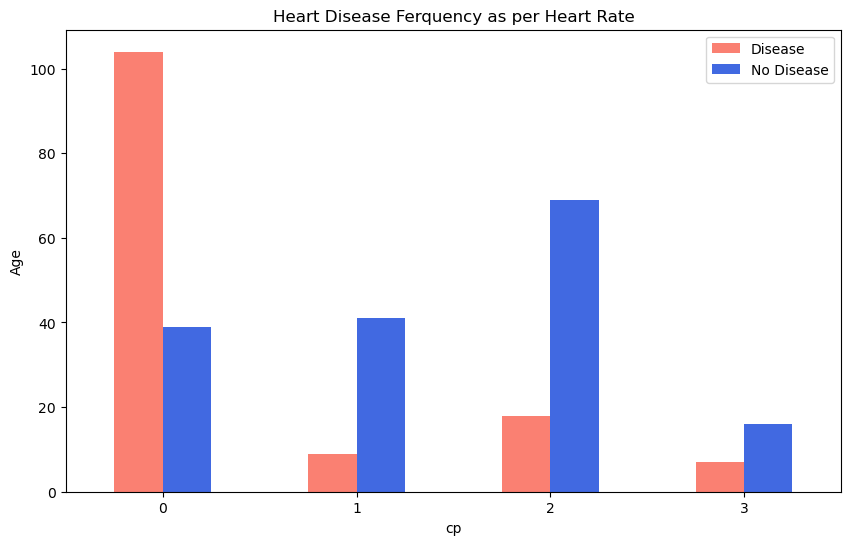

In [13]:
#Visualizing the crossstab
pd.crosstab(df["cp"],df["target"]).plot(kind="bar",figsize=(10,6),color = (["salmon","royalblue"]))
plt.xticks(rotation=0)
plt.title("Heart Disease Ferquency as per Heart Rate")
plt.legend(["Disease","No Disease"])
plt.xlabel("cp")
plt.ylabel("Age");

In [14]:
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

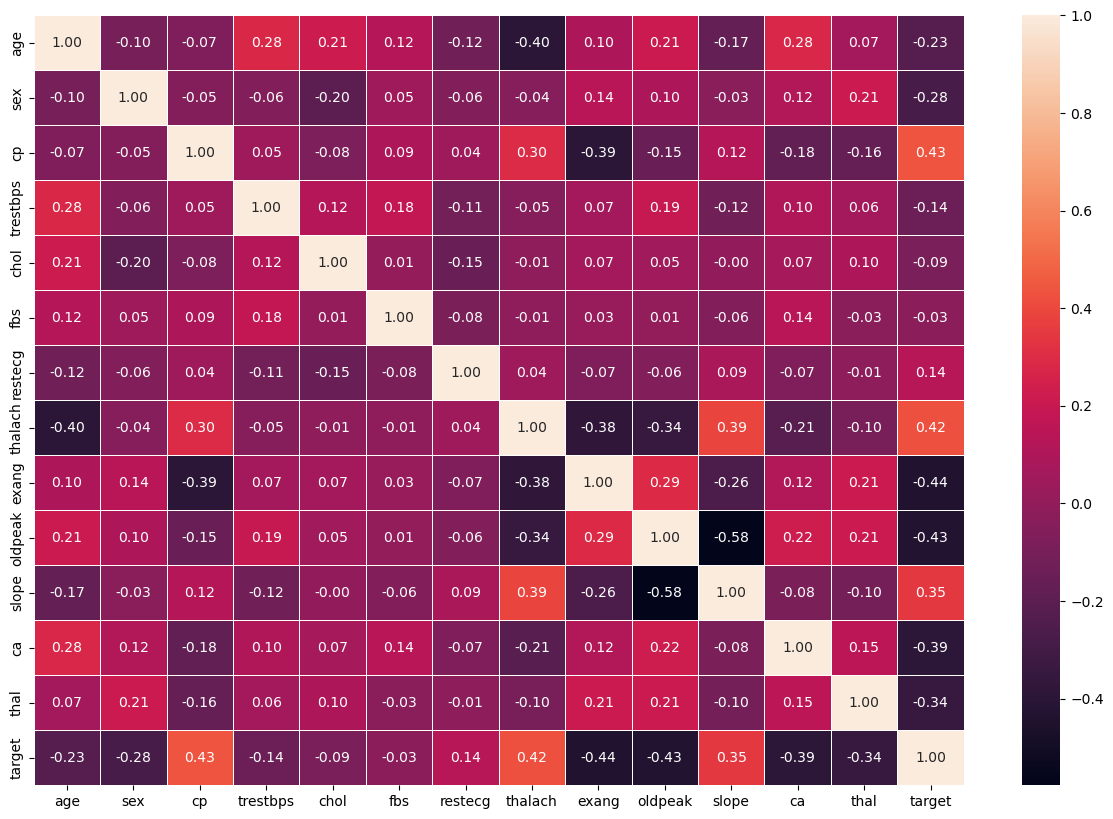

In [15]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap=None)

# Modelling


In [16]:
#split the data
X = df.drop("target",axis=1)
Y = df["target"]

In [17]:
np.random.seed(42)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

#### Going to try 3 diff models
1. LogisticRegression
2. RandomForestClassifier
3. KNeighborsClassifier

In [18]:
#Put models in a dictionary
models = {"LogisticRegression":LogisticRegression(),
          "RandomForestClassifier":RandomForestClassifier(),
          "KNeighborsClassifier":KNeighborsClassifier()}

#create a function to fit and score model
def fit_score(models,X_train,X_test,Y_train,Y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(X_train,Y_train)
        model_scores[name] = model.score(X_test,Y_test)
    return model_scores


In [19]:
model_scores=fit_score(models,X_train,X_test,Y_train,Y_test)
model_scores

C:\Users\SreeRam\Desktop\ml-projects\project_heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'RandomForestClassifier': 0.8360655737704918,
 'KNeighborsClassifier': 0.6885245901639344}

Text(0, 0.5, 'score')

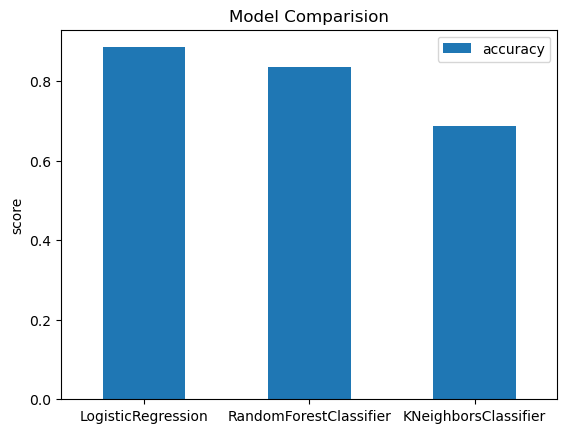

In [20]:
#Comparing
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0)
plt.title("Model Comparision")
plt.ylabel("score")

#### Now we have baseline model but still there is a room for improvement
let's look the following
1. Precision
2. Recall
3. classification report
4. confusion matrix
5. ROC curve
6. Area Under the Curve (AUC)
7. HyperParameter Tuning
8. F1 Score
9. Cross-validation
10. Feature Importance

# Hyper Parameter Training KNN

In [21]:
test_scores = []
train_scores = []

knn = KNeighborsClassifier()

neighbors = range(1,21)

for i in neighbors:
    #Tuning hyperparameters
    knn.set_params(n_neighbors=i)

    #Fitting the model
    knn.fit(X_train,Y_train)

    #Updating training and testing scores
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))

In [22]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [23]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

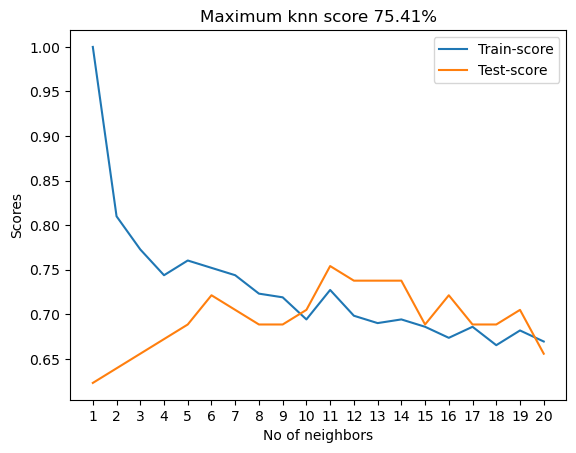

In [24]:
plt.plot(neighbors,train_scores,label="Train-score")
plt.plot(neighbors,test_scores,label="Test-score")
plt.legend()
plt.xlabel("No of neighbors")
plt.ylabel("Scores")
plt.xticks(range(1,21))
plt.title(f"Maximum knn score {max(test_scores)*100:.2f}%");

### Even after tuning KNN performance is not considerable compared to other models so for now we neglect this model

# Hyper-parameter Tuning with RandomizedSearchCV
let's tune:
1. LogisticRegression()
2. RandomForestClassifier()
   ......using RandomizedSearchCV

In [37]:
log_reg_grid = {"C":np.logspace(-4,4,20),"solver":["liblinear"]}
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}
           

##### Now let's tune them using RandomizedSearchCV

In [26]:
#Tune logisiticregression
np.random.seed(42)
#Setup the random hyperparameter search for logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,n_iter=20,cv = 5,verbose=True)
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [28]:
rs_log_reg.score(X_test,Y_test)

0.8852459016393442

In [30]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'RandomForestClassifier': 0.8360655737704918,
 'KNeighborsClassifier': 0.6885245901639344}

# Same score for logisticregression now lets try for randomforestclassifier

In [38]:
np.random.seed(42)
#randomsearch on randomforestclassifier
rs_rf =RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,n_iter=20,cv = 5,verbose=True)
#Fitting the tuned model
rs_rf.fit(X_train,Y_train)
#score
rs_rf.score(X_test,Y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8688524590163934

In [35]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'RandomForestClassifier': 0.8360655737704918,
 'KNeighborsClassifier': 0.6885245901639344}

##### As we can see even after tuning thought there is a rise in score of randomforestclassifier but not moret than the logisticregression model 

In [39]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

## Hyper-Parameter tuning using GridsearchCV
since our LogisticRegression model provides best score so far so let's try to impove that more by tuning the parametrs

In [44]:
#Setting up paramters that are gonna be tuned
gs_lg_reg_grid = {"C":np.logspace(-4,4,30),"solver":["liblinear"]}
#Let's Tune
gs_lg_reg = GridSearchCV(LogisticRegression(),param_grid=gs_lg_reg_grid,cv = 5,verbose=True)
#Let's train the tuned model
gs_lg_reg.fit(X_train,Y_train)
#Test it!
gs_lg_reg.score(X_test,Y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.8852459016393442

In [45]:
gs_lg_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

# Even after Tuning using GridsearchCV our linearregression model score still the same , so let's just consider this model for our project

# Now Let's Evaluate the machine learning classifier beyond the accuracy
1. ROC Curve and AUC score
2. Confusion matrix
3. classification report
4. Precision
5. Recall
6. F1-score
    * Let's make predictions to evaluate the model

In [58]:
#Making predictions
y_preds = gs_lg_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

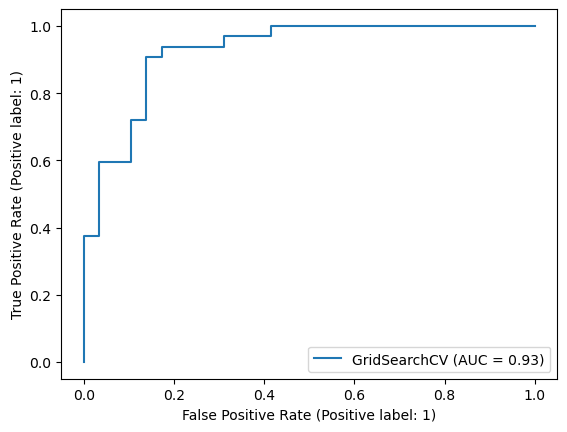

In [53]:
#Plot the roc_curve
RocCurveDisplay.from_estimator(gs_lg_reg,X_test,Y_test)
plt.show()

## Confusion matrix


In [70]:
cm = confusion_matrix(Y_test,y_preds)
print(confusion_matrix(Y_test,y_preds))

[[25  4]
 [ 3 29]]


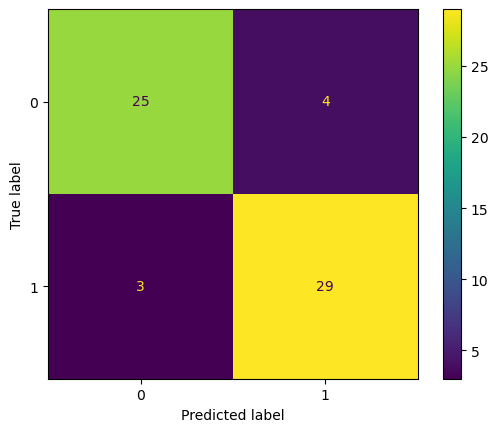

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay
# ConfusionMatrixDisplay(cm).plot()
ConfusionMatrixDisplay.from_predictions(Y_test,y_preds);

# Classification report


In [76]:
print(classification_report(Y_test,y_preds)) #but this report is only on one set of test data not cross validated

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [78]:
#Let's cross validate the evaluation metrics
gs_lg_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [79]:
clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')

In [83]:
# Cross validated accuracy
cv_acc = cross_val_score(clf,X,Y,cv=5,scoring = "accuracy")
cv_acc = cv_acc.mean()
cv_acc

0.8446994535519124

In [84]:
# Cross validated precision
cv_prec = cross_val_score(clf,X,Y,cv=5,scoring = "precision")
cv_prec = cv_prec.mean()
cv_prec

0.8207936507936507

In [85]:
# Cross validated recall
cv_rec = cross_val_score(clf,X,Y,cv=5,scoring = "recall")
cv_rec = cv_rec.mean()
cv_rec

0.9212121212121213

In [86]:
# Cross validated f1
cv_f1 = cross_val_score(clf,X,Y,cv=5,scoring = "f1")
cv_f1 = cv_f1.mean()
cv_f1

0.8673007976269721

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precision'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'f1-score')])

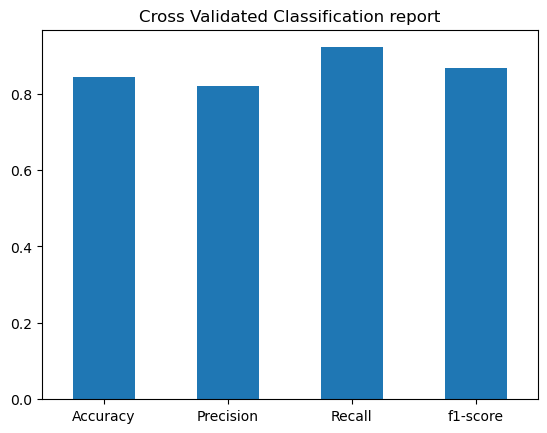

In [97]:
#Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_prec,
                           "Recall":cv_rec,
                           "f1-score":cv_f1},index=[0])
cv_metrics.T.plot.bar(title="Cross Validated Classification report",legend = False)
plt.xticks(rotation=0)


# Features Importance:
    The idea behind feature importance is to understand which features have the most influence on the model's predictions

In [99]:
#Lets take the instance of the tuned model
gs_lg_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [101]:
clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')
clf.fit(X_train,Y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [110]:
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [111]:
#Matching coefs of featuers to the columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))

In [112]:
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

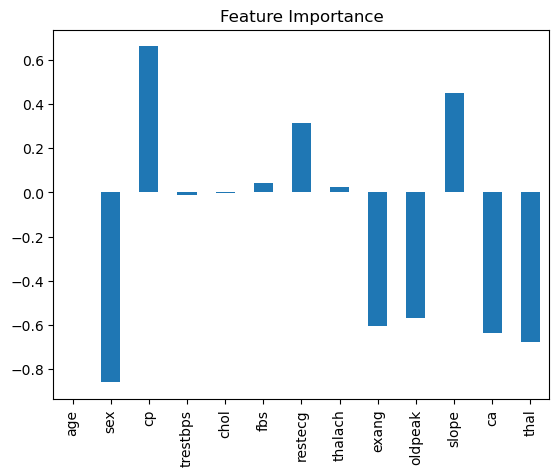

In [120]:
features_df = pd.DataFrame(feature_dict,index=[0])
features_df.T.plot.bar(title = "Feature Importance",legend = None);

In [121]:
X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2